# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [4]:
#Importo tutte le librerie necessarie

import numpy as np # Libreria per la manipolazione di array e calcoli matematici
import pandas as pd # Libreria per la manipolazione e l'analisi di dati
import matplotlib.pyplot as plt  # Libreria per la creazione di grafici

In [5]:
#Figure più leggibili

# Imposto le dimensioni del titolo dell'asse
plt.rcParams['axes.titlesize'] = 16

# Imposto le dimensioni delle etichette dell'asse
plt.rcParams['axes.labelsize'] = 14

# Imposto le dimensioni della legenda
plt.rcParams['legend.fontsize'] = 12

# Imposto le dimensioni dei tick sull'asse x
plt.rcParams['xtick.labelsize'] = 12

# Imposto le dimensioni dei tick sull'asse y
plt.rcParams['ytick.labelsize'] = 12

# Disabilito le linee del bordo destro degli assi
plt.rcParams['axes.spines.right'] = False

# Disabilito le linee del bordo superiore degli assi
plt.rcParams['axes.spines.top'] = False

# Imposto la griglia
plt.rcParams['axes.grid'] = True

In [40]:
# Carico i dati dai file e li converto in array NumPy
dati_pot_sol = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_PE:", "PE_AVE:", "ERROR:"])

In [61]:
dati_pot_liq = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_PE:", "PE_AVE:", "ERROR:"])

In [27]:
dati_pot_gas = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK:", "ACTUAL_PE:", "PE_AVE:", "ERROR:"])

In [95]:
pot_sol = dati_pot_sol["ACTUAL_PE:"]
pot_liq = dati_pot_liq["ACTUAL_PE:"]
pot_gas = dati_pot_gas["ACTUAL_PE:"]

In [9]:
def autocorrelazione(t, t_max, dati):
    # Calcola il fattore di normalizzazione delta
    delta = 1. / (t_max - t)
    
    # Inizializza le variabili per i calcoli intermedi
    primo = 0.
    secondo = 0.
    terzo = 0.
    quarto = 0.
    quinto = 0.
    
    # Calcola i primi tre termini sommando i prodotti dei dati sfasati di t e le somme dei dati
    for i in range(t_max - t):
        primo += dati[i] * dati[i + t]
        secondo += dati[i]
        terzo += dati[i + t]
    
    # Applica il fattore di normalizzazione delta ai primi tre termini
    primo *= delta
    secondo *= delta
    terzo *= delta
    
    # Calcola il quarto e il quinto termine: la somma dei quadrati dei dati e la somma dei dati
    for i in range(t_max):
        quarto += dati[i] ** 2
        quinto += dati[i]
    
    # Calcola la media del quadrato dei dati
    quarto /= t_max
    # Calcola il quadrato della media dei dati
    quinto = (quinto / t_max) ** 2
    
    # Ritorna il valore dell'autocorrelazione
    return (primo - secondo * terzo) / (quarto - quinto)

In [77]:
t_max = 500000
auto_corr_sol = []
auto_corr_liq = []
auto_corr_gas = []

# Calcola l'autocorrelazione per il potenziale solido
for i in range(400):
    # Ogni 10 iterazioni
    if i % 10 == 0:
        # Aggiunge il valore dell'autocorrelazione alla lista auto_corr_sol
        auto_corr_sol.append(autocorrelazione(i, t_max, pot_sol))

# Calcola l'autocorrelazione per il potenziale liquido
for i in range(400):
    # Ogni 10 iterazioni
    if i % 10 == 0:
        # Aggiunge il valore dell'autocorrelazione alla lista auto_corr_liq
        auto_corr_liq.append(autocorrelazione(i, t_max, pot_liq))

# Calcola l'autocorrelazione per il potenziale gassoso
for i in range(400):
    # Ogni 10 iterazioni
    if i % 10 == 0:
        # Aggiunge il valore dell'autocorrelazione alla lista auto_corr_gas
        auto_corr_gas.append(autocorrelazione(i, t_max, pot_gas))

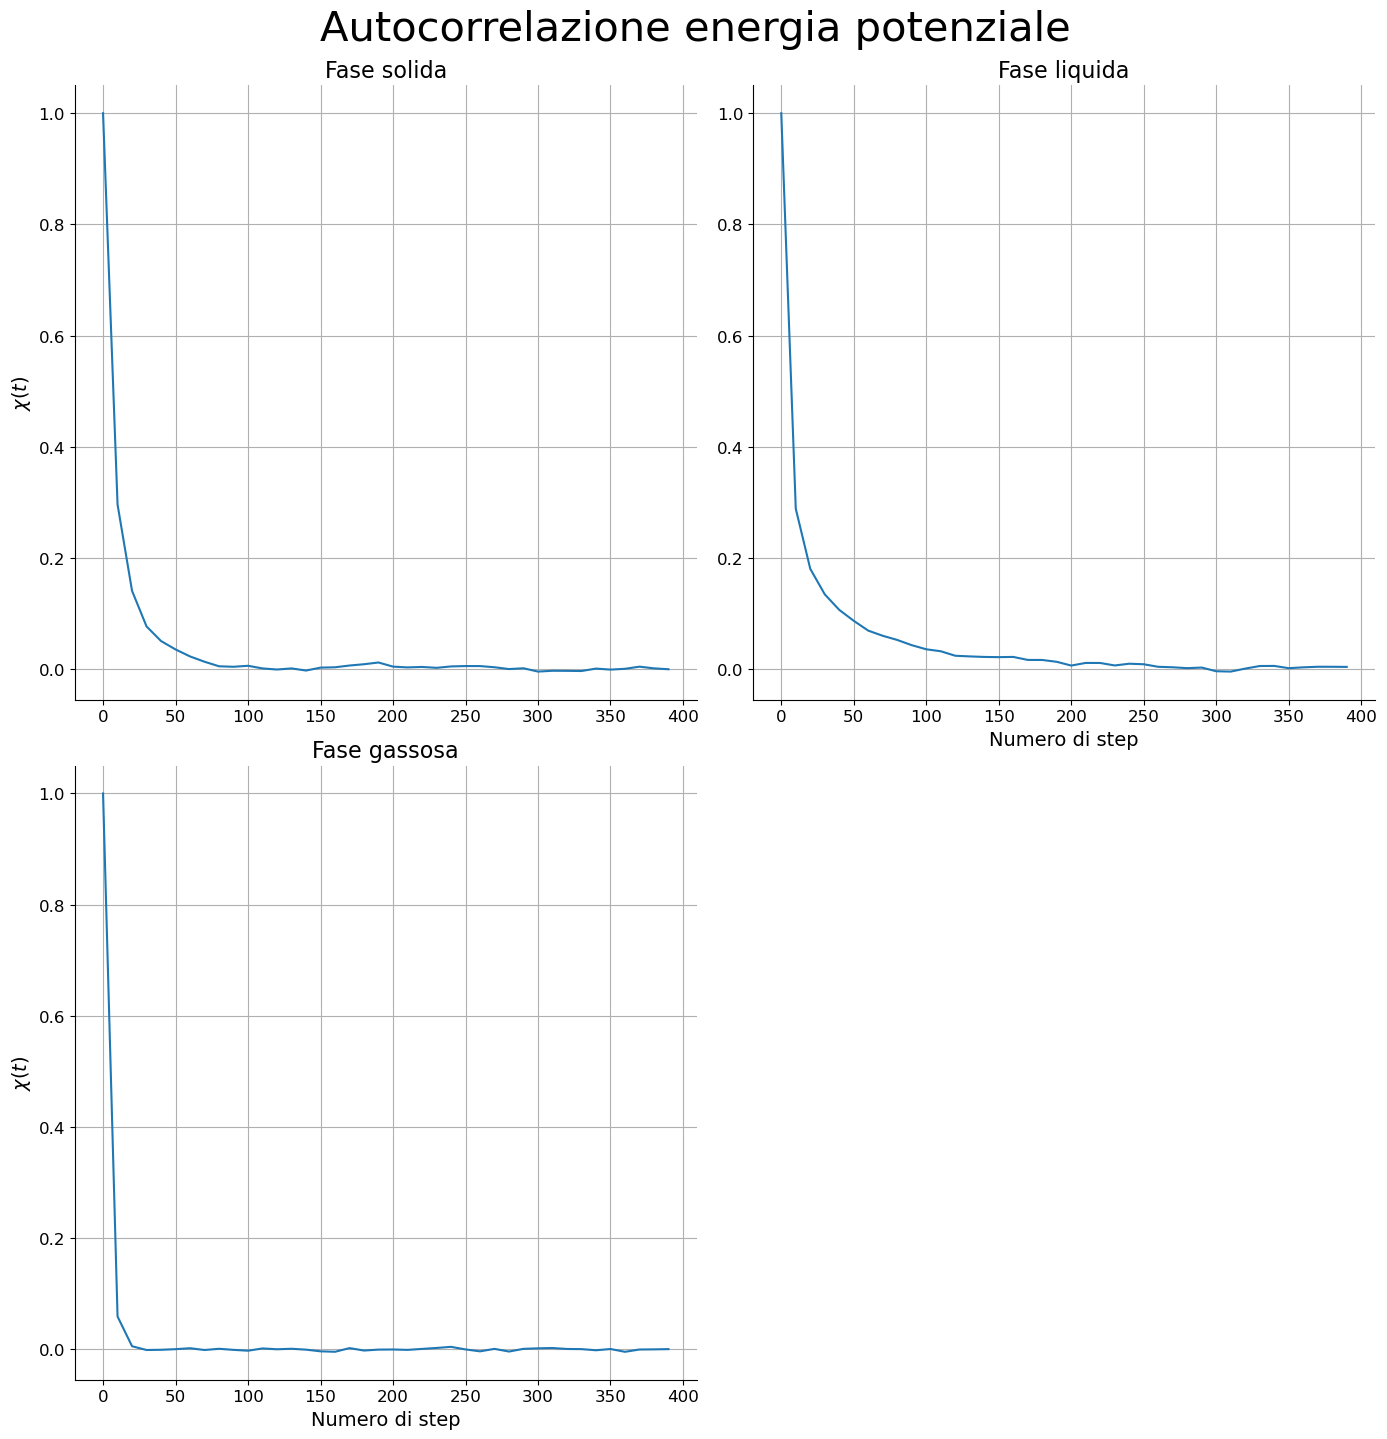

In [121]:
# Creo una figura con 5 subplots per le diverse grandezze
fig, axx = plt.subplots(2, 2, figsize = (14,14))

# Creo i grafici a barre con errori
x_label = np.arange(40)*10

axx[0,0].plot(x_label, auto_corr_sol)
# axx[0,0].set_yscale("log")
# axx[0,0].set_xlim(0,110)
axx[0,1].plot(x_label, auto_corr_liq)
axx[1,0].plot(x_label, auto_corr_gas)

# Etichette degli assi
axx[0,0].set_ylabel('$\chi (t)$')

axx[0,1].set_xlabel('Numero di step')

axx[1,0].set_xlabel('Numero di step')
axx[1,0].set_ylabel('$\chi (t)$')

# Titolo
axx[0,0].set_title("Fase solida")
axx[0,1].set_title("Fase liquida")
axx[1,0].set_title("Fase gassosa")

# Rimuovo l'ultimo subplot vuoto
fig.delaxes(axx[1,1])

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Autocorrelazione energia potenziale', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

In [211]:
# Numero totale di dati
M = 500000

# Array delle dimensioni dei blocchi
L = np.array([10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000])

# Numero di blocchi corrispondente a ciascuna dimensione dei blocchi
N = M // L

# Calcola il quadrato degli array dell'energia potenziale
pot_sol_2 = pot_sol**2
pot_liq_2 = pot_liq**2
pot_gas_2 = pot_gas**2

# Funzione per calcolare l'errore statistico
def errore(dati, dati_2, n_blocchi):
    return np.sqrt((1./(n_blocchi - 1)) * ((1./n_blocchi) * sum(dati_2) - ((1./n_blocchi) * sum(dati))**2))

# Liste per memorizzare gli errori calcolati
errori_sol = []
errori_liq = []
errori_gas = []

# Ciclo sul numero di blocchi
for n in N:
    # Inizializzazione degli array per le medie dei blocchi e le medie dei quadrati dei blocchi
    media_blocchi_sol = np.zeros(n)
    media_blocchi_2_sol = np.zeros(n)
    media_blocchi_liq = np.zeros(n)
    media_blocchi_2_liq = np.zeros(n)
    media_blocchi_gas = np.zeros(n)
    media_blocchi_2_gas = np.zeros(n)
    
    # Lunghezza di ciascun blocco
    l = M // n
    
    # Ciclo sui blocchi
    for i in range(n):
        # Calcolo della somma dei dati e dei quadrati dei dati per ciascun blocco
        media_blocchi_sol[i] = sum(pot_sol[i*l : i*l + l])
        media_blocchi_2_sol[i] = sum(pot_sol_2[i*l : i*l + l])
        media_blocchi_liq[i] = sum(pot_liq[i*l : i*l + l])
        media_blocchi_2_liq[i] = sum(pot_liq_2[i*l : i*l + l])
        media_blocchi_gas[i] = sum(pot_gas[i*l : i*l + l])
        media_blocchi_2_gas[i] = sum(pot_gas_2[i*l : i*l + l])
    
    # Calcolo della media dei dati e dei quadrati dei dati per ciascun blocco
    media_blocchi_sol /= l
    media_blocchi_2_sol /= l
    media_blocchi_liq /= l
    media_blocchi_2_liq /= l
    media_blocchi_gas /= l
    media_blocchi_2_gas /= l
    
    # Calcolo dell'errore e aggiunta alla lista degli errori
    errori_sol.append(errore(media_blocchi_sol, media_blocchi_2_sol, n))
    errori_liq.append(errore(media_blocchi_liq, media_blocchi_2_liq, n))
    errori_gas.append(errore(media_blocchi_gas, media_blocchi_2_gas, n))

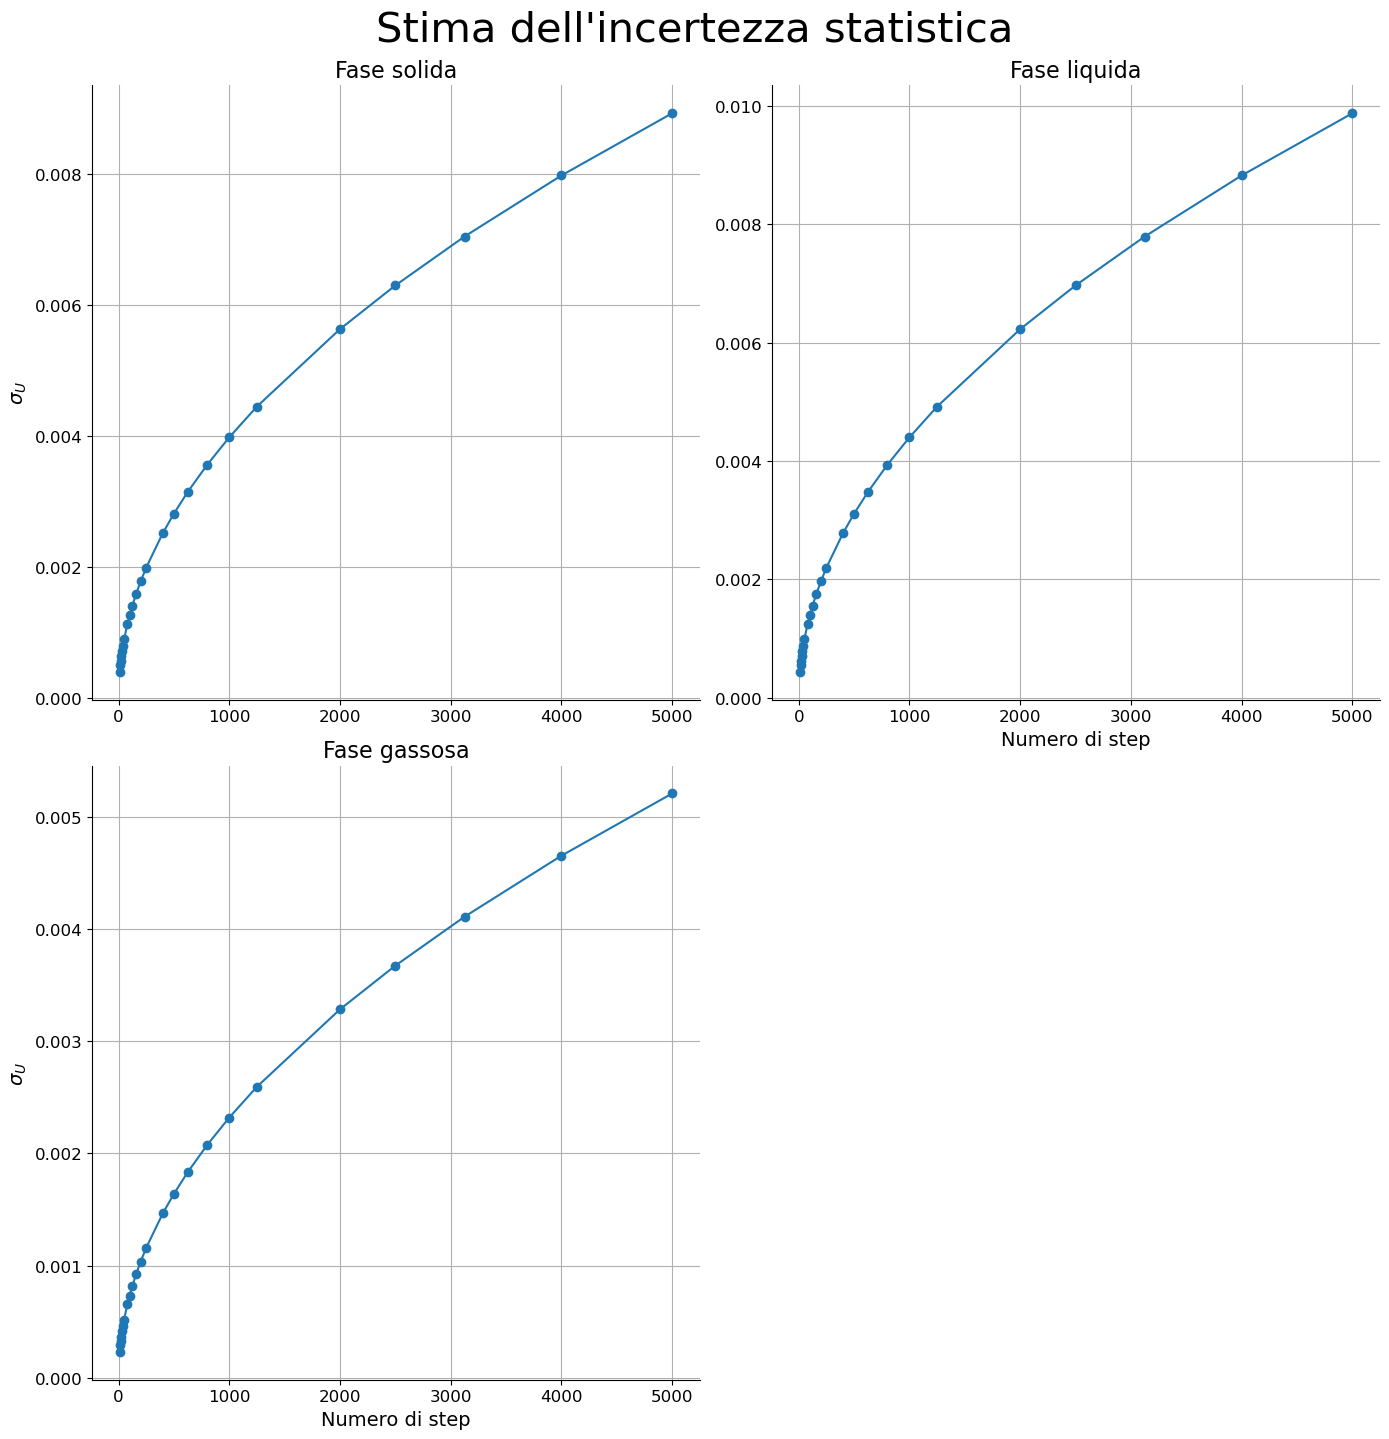

In [217]:
# Creo una figura con 5 subplots per le diverse grandezze
fig, axx = plt.subplots(2, 2, figsize = (14,14))

axx[0,0].plot(L, errori_sol, marker="o")
axx[0,1].plot(L, errori_liq, marker="o")
axx[1,0].plot(L, errori_gas, marker="o")

# Etichette degli assi
axx[0,0].set_ylabel('$\sigma_U$')

axx[0,1].set_xlabel('Numero di step')

axx[1,0].set_xlabel('Numero di step')
axx[1,0].set_ylabel('$\sigma_U$')

# Titolo
axx[0,0].set_title("Fase solida")
axx[0,1].set_title("Fase liquida")
axx[1,0].set_title("Fase gassosa")

# Rimuovo l'ultimo subplot vuoto
fig.delaxes(axx[1,1])

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle("Stima dell'incertezza statistica", fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [23]:
# Carico i dati dai file
gofr_sol_MC = pd.read_csv("OUTPUT/gofr_fin.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["DISTANCE", "AVE_GOFR", "ERROR"])
pot_sol_MC = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_PE", "PE_AVE", "ERROR"])
p_sol_MC = pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_P", "P_AVE", "ERROR"])

In [27]:
gofr_liq_MC = pd.read_csv("OUTPUT/gofr_fin.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["DISTANCE", "AVE_GOFR", "ERROR:"])
pot_liq_MC = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_PE", "PE_AVE", "ERROR"])
p_liq_MC = pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_P", "P_AVE", "ERROR"])

In [39]:
gofr_gas_MC = pd.read_csv("OUTPUT/gofr_fin.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["DISTANCE", "AVE_GOFR", "ERROR"])
pot_gas_MC = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_PE", "PE_AVE", "ERROR"])
p_gas_MC = pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_P", "P_AVE", "ERROR"])

In [24]:
gofr_sol_MD = pd.read_csv("OUTPUT/gofr_fin.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["DISTANCE", "AVE_GOFR", "ERROR"])
pot_sol_MD = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_PE", "PE_AVE", "ERROR"])
p_sol_MD = pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_P", "P_AVE", "ERROR"])

In [26]:
gofr_liq_MD = pd.read_csv("OUTPUT/gofr_fin.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["DISTANCE", "AVE_GOFR", "ERROR:"])
pot_liq_MD = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_PE", "PE_AVE", "ERROR"])
p_liq_MD = pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_P", "P_AVE", "ERROR"])

In [38]:
gofr_gas_MD = pd.read_csv("OUTPUT/gofr_fin.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["DISTANCE", "AVE_GOFR", "ERROR"])
pot_gas_MD = pd.read_csv("OUTPUT/potential_energy.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_PE", "PE_AVE", "ERROR"])
p_gas_MD = pd.read_csv("OUTPUT/pressure.dat", sep = "\s+", index_col = False, header = 0,
                       names = ["BLOCK", "ACTUAL_P", "P_AVE", "ERROR"])

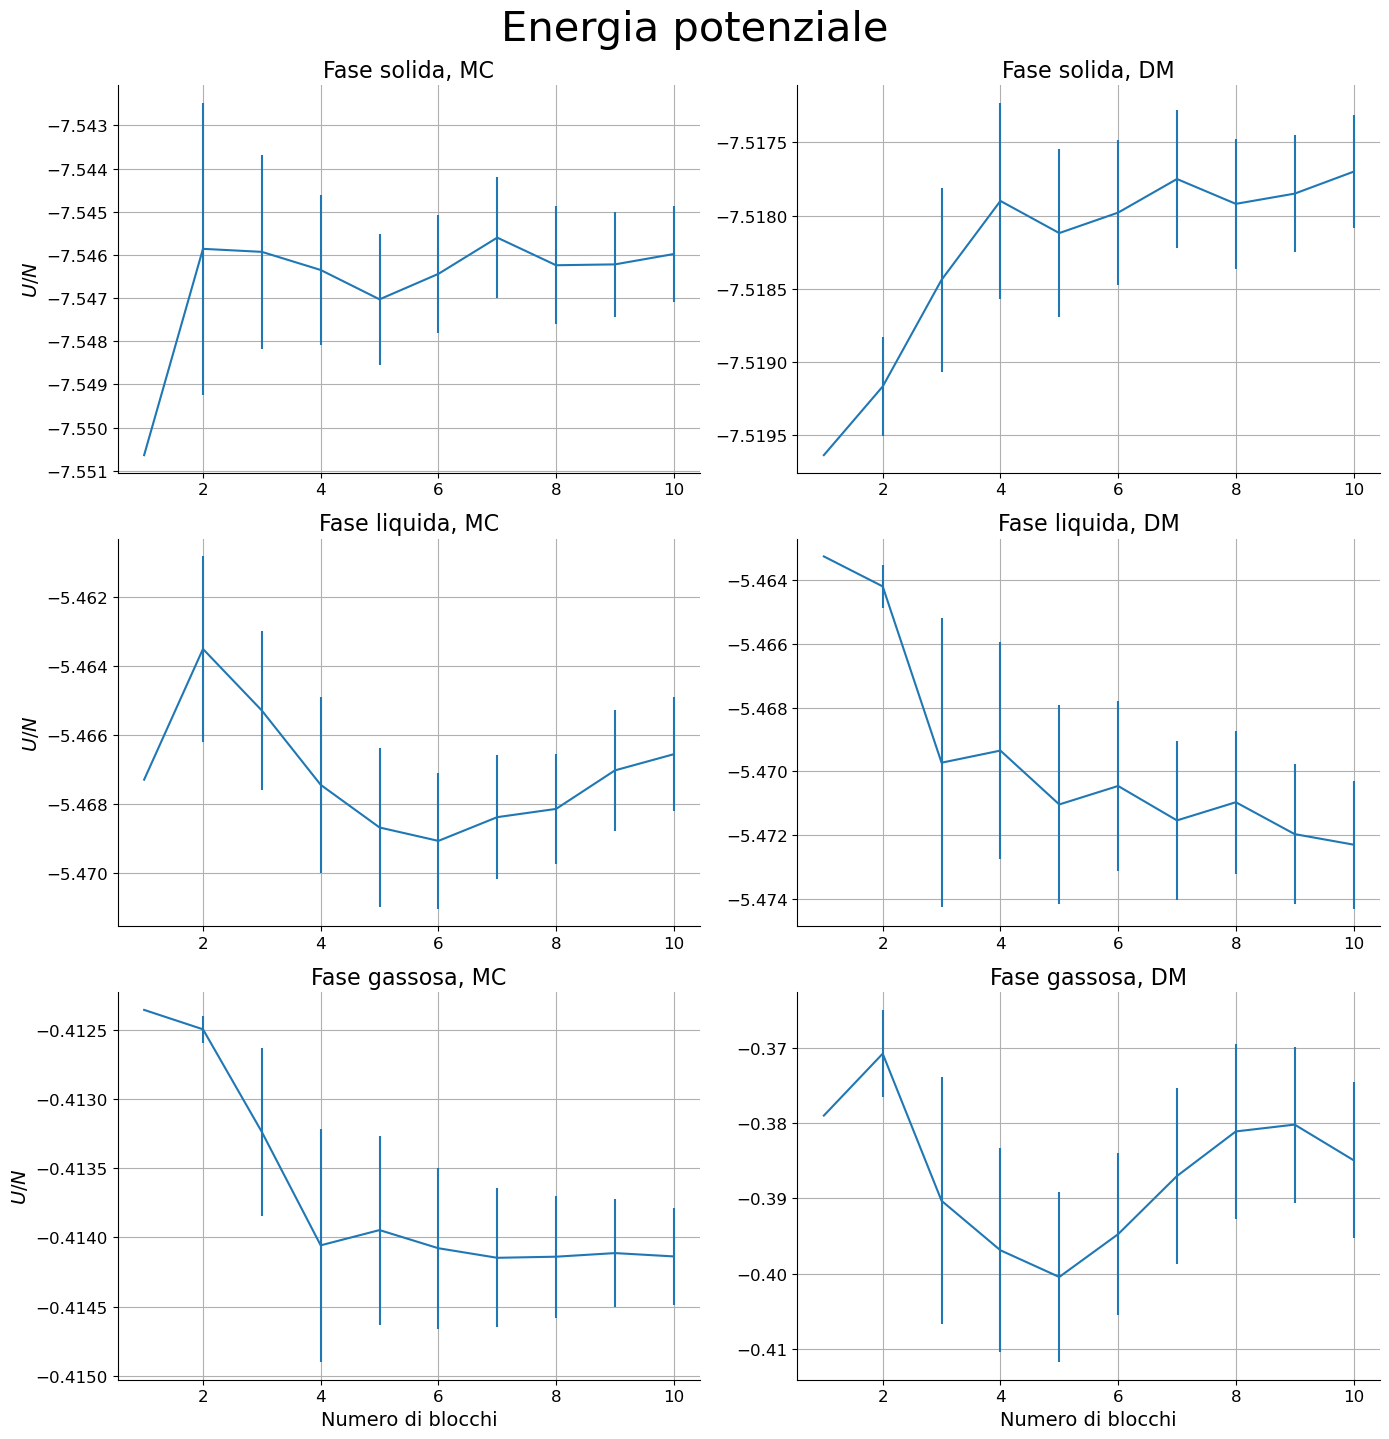

In [41]:
# Creo una figura con 3 subplots per le diverse grandezze
fig, axx = plt.subplots(3, 2, figsize = (14,14))

# Creo i grafici a barre con errori

axx[0,0].errorbar(pot_sol_MC.BLOCK, pot_sol_MC.PE_AVE, pot_sol_MC.ERROR)
axx[0,1].errorbar(pot_sol_MD.BLOCK, pot_sol_MD.PE_AVE, pot_sol_MD.ERROR)

axx[1,0].errorbar(pot_liq_MC.BLOCK, pot_liq_MC.PE_AVE, pot_liq_MC.ERROR)
axx[1,1].errorbar(pot_liq_MD.BLOCK, pot_liq_MD.PE_AVE, pot_liq_MD.ERROR)

axx[2,0].errorbar(pot_gas_MC.BLOCK, pot_gas_MC.PE_AVE, pot_gas_MC.ERROR)
axx[2,1].errorbar(pot_gas_MD.BLOCK, pot_gas_MD.PE_AVE, pot_gas_MD.ERROR)

# Etichette degli assi
axx[0,0].set_ylabel('$U/N$')

axx[1,0].set_ylabel('$U/N$')

axx[2,0].set_xlabel('Numero di blocchi')
axx[2,0].set_ylabel('$U/N$')

axx[2,1].set_xlabel('Numero di blocchi')

# Titolo
axx[0,0].set_title("Fase solida, MC")
axx[0,1].set_title("Fase solida, DM")
axx[1,0].set_title("Fase liquida, MC")
axx[1,1].set_title("Fase liquida, DM")
axx[2,0].set_title("Fase gassosa, MC")
axx[2,1].set_title("Fase gassosa, DM")

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Energia potenziale', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

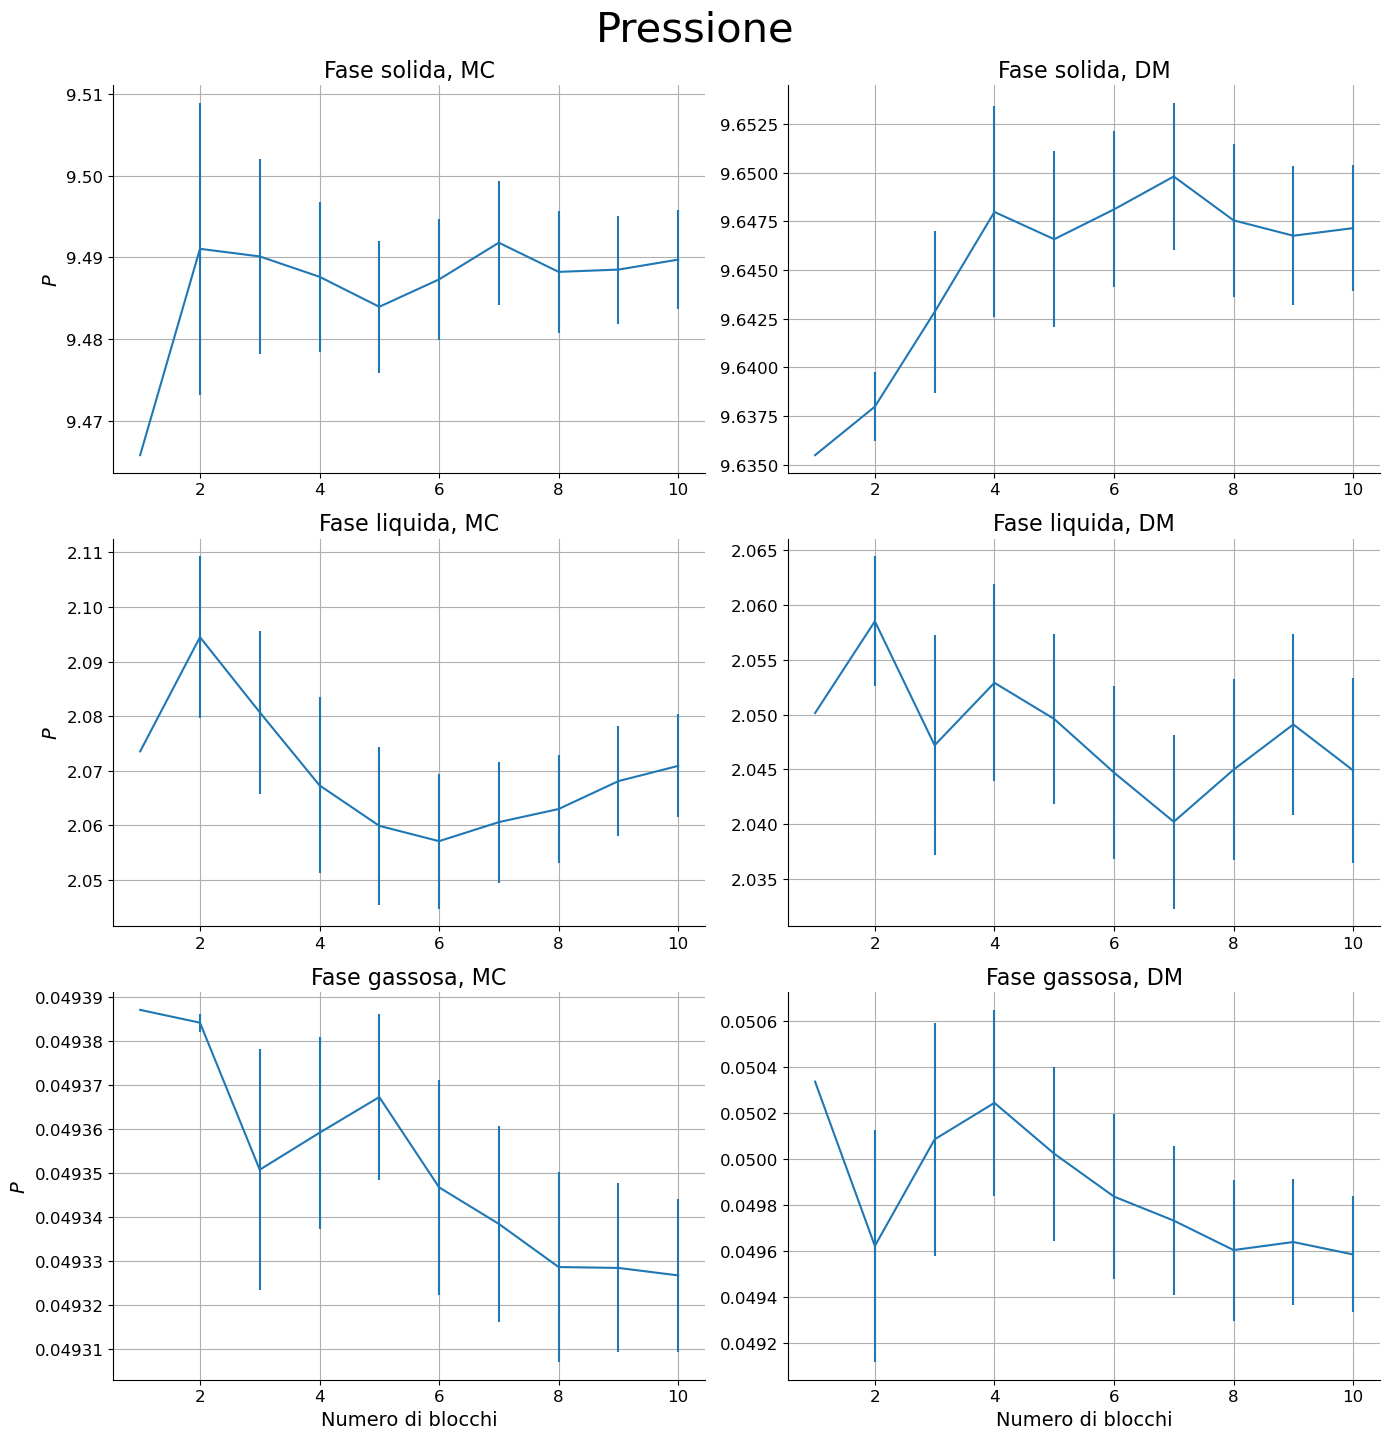

In [42]:
# Creo una figura con 3 subplots per le diverse grandezze
fig, axx = plt.subplots(3, 2, figsize = (14,14))

# Creo i grafici a barre con errori

axx[0,0].errorbar(p_sol_MC.BLOCK, p_sol_MC.P_AVE, p_sol_MC.ERROR)
axx[0,1].errorbar(p_sol_MD.BLOCK, p_sol_MD.P_AVE, p_sol_MD.ERROR)

axx[1,0].errorbar(p_liq_MC.BLOCK, p_liq_MC.P_AVE, p_liq_MC.ERROR)
axx[1,1].errorbar(p_liq_MD.BLOCK, p_liq_MD.P_AVE, p_liq_MD.ERROR)

axx[2,0].errorbar(p_gas_MC.BLOCK, p_gas_MC.P_AVE, p_gas_MC.ERROR)
axx[2,1].errorbar(p_gas_MD.BLOCK, p_gas_MD.P_AVE, p_gas_MD.ERROR)

# Etichette degli assi
axx[0,0].set_ylabel('$P$')

axx[1,0].set_ylabel('$P$')

axx[2,0].set_xlabel('Numero di blocchi')
axx[2,0].set_ylabel('$P$')

axx[2,1].set_xlabel('Numero di blocchi')

# Titolo
axx[0,0].set_title("Fase solida, MC")
axx[0,1].set_title("Fase solida, DM")
axx[1,0].set_title("Fase liquida, MC")
axx[1,1].set_title("Fase liquida, DM")
axx[2,0].set_title("Fase gassosa, MC")
axx[2,1].set_title("Fase gassosa, DM")

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Pressione', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()

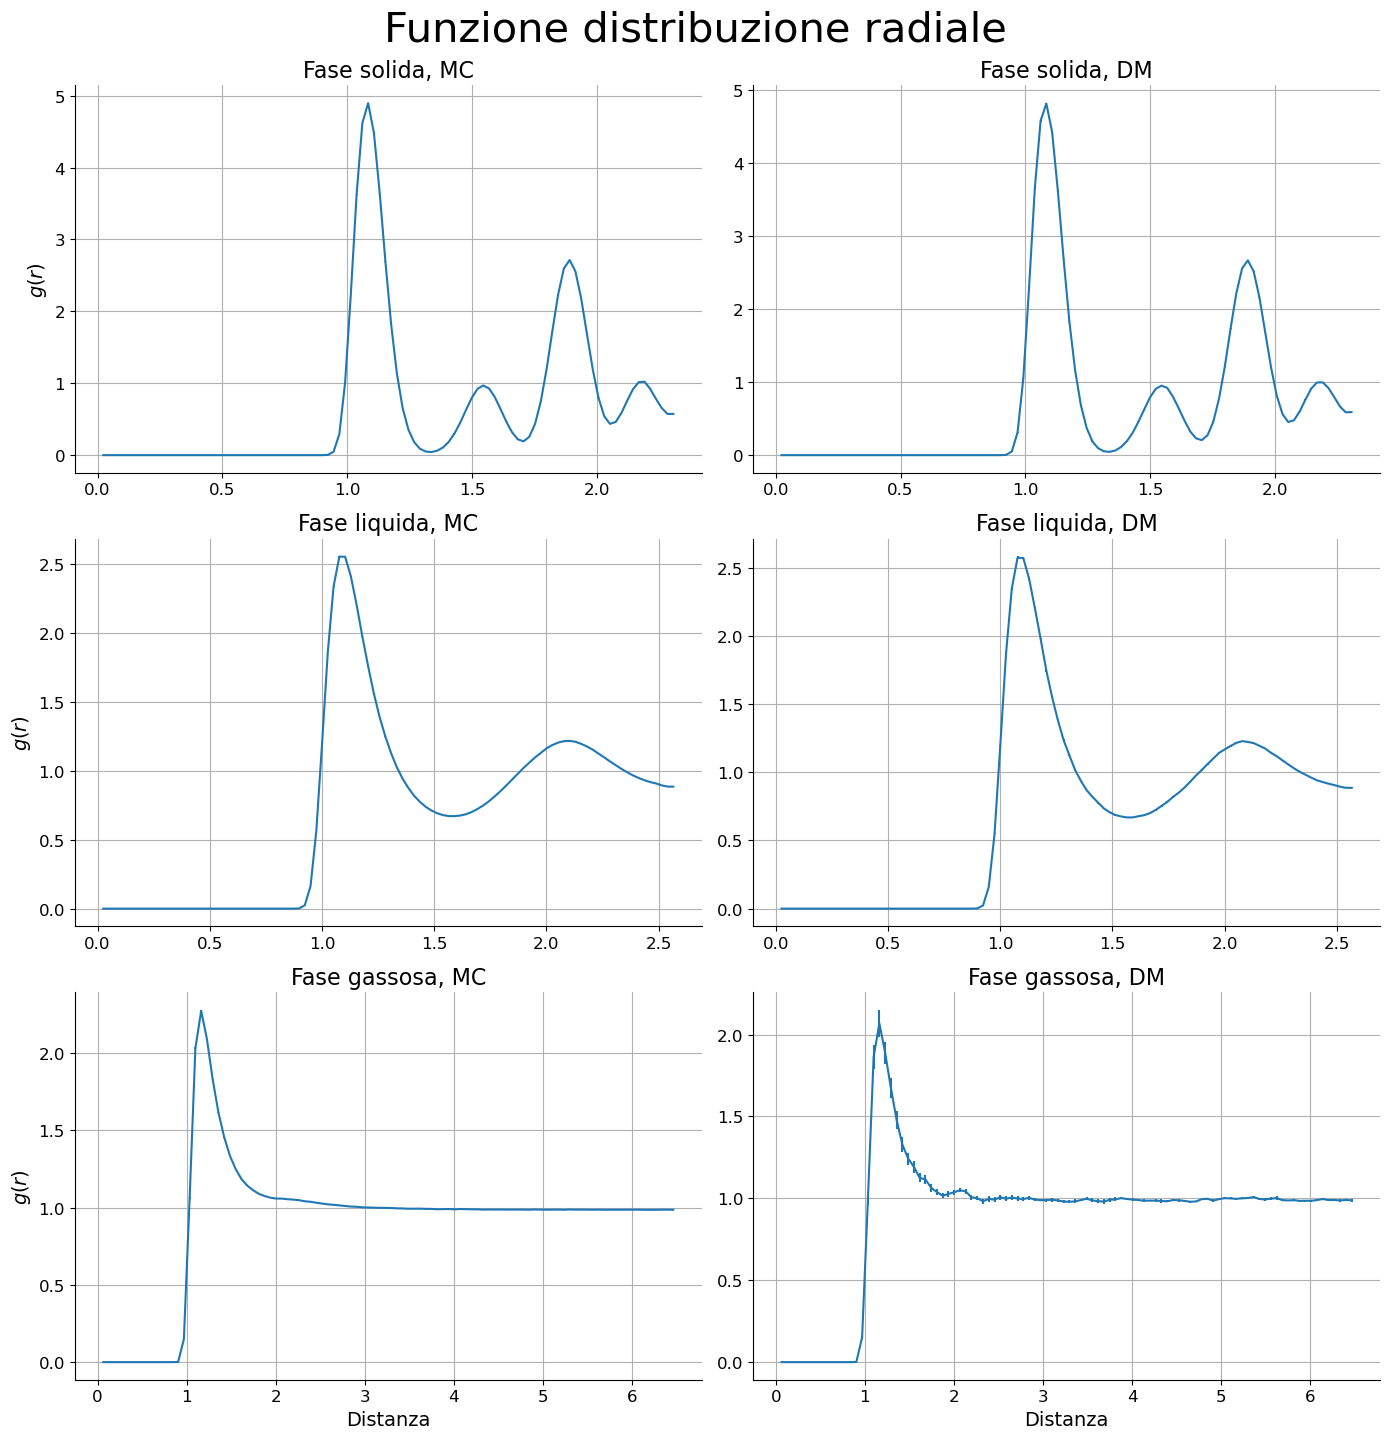

In [43]:
# Creo una figura con 3 subplots per le diverse grandezze
fig, axx = plt.subplots(3, 2, figsize = (14,14))

# Creo i grafici a barre con errori

axx[0,0].errorbar(gofr_sol_MC.DISTANCE, gofr_sol_MC.AVE_GOFR, gofr_sol_MC['ERROR'])
axx[0,1].errorbar(gofr_sol_MD.DISTANCE, gofr_sol_MD.AVE_GOFR, gofr_sol_MD['ERROR'])

axx[1,0].errorbar(gofr_liq_MC.DISTANCE, gofr_liq_MC.AVE_GOFR, gofr_liq_MC['ERROR:'])
axx[1,1].errorbar(gofr_liq_MD.DISTANCE, gofr_liq_MD.AVE_GOFR, gofr_liq_MD['ERROR:'])

axx[2,0].errorbar(gofr_gas_MC.DISTANCE, gofr_gas_MC.AVE_GOFR, gofr_gas_MC['ERROR'])
axx[2,1].errorbar(gofr_gas_MD.DISTANCE, gofr_gas_MD.AVE_GOFR, gofr_gas_MD['ERROR'])

# Etichette degli assi
axx[0,0].set_ylabel('$g(r)$')

axx[1,0].set_ylabel('$g(r)$')

axx[2,0].set_xlabel('Distanza')
axx[2,0].set_ylabel('$g(r)$')

axx[2,1].set_xlabel('Distanza')

# Titolo
axx[0,0].set_title("Fase solida, MC")
axx[0,1].set_title("Fase solida, DM")
axx[1,0].set_title("Fase liquida, MC")
axx[1,1].set_title("Fase liquida, DM")
axx[2,0].set_title("Fase gassosa, MC")
axx[2,1].set_title("Fase gassosa, DM")

# Ottimizzo lo spaziamento tra i plot
plt.tight_layout()

# Aggiungo il titolo alla figura
fig.suptitle('Funzione distribuzione radiale', fontsize = 30, y = 1.025)

# Mostro il grafico
plt.show()